In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `hpcc`

In [3]:
# read the hpcc.csv file

df = pd.read_csv('hpcc.csv')
df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09,1.00E-09
1,HPL_Tflops,0.00514137,0.00512789,0.00511576,0.00552649,0.00559106,0.0055386,0.00548935,0.00551584,0.00554237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16,1.11E-16
4,HPL_RnormI,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09,4.67E-09


In [17]:
# Convert all columns except 'RUN' to numeric, coercing errors to NaN
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Drop rows where any column except 'RUN' has NaN values
df = df.dropna()

df.head()

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HPL_Gflops,5.14137,5.12789,5.11576,5.52649,5.59106,5.5386,5.48935,5.51584,5.54237
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HPL_RnormI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Multiply row 1 by 10^3
df.iloc[1, 1:] = pd.to_numeric(df.iloc[1, 1:]) * 10**3

# Rename the row
df.iloc[1, 0] = "HPL_Gflops"

df.head()

/tmp/ipykernel_7886/592742911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1, 1:] = pd.to_numeric(df.iloc[1, 1:]) * 10**3
/tmp/ipykernel_7886/592742911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[1, 0] = "HPL_Gflops"


,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3
0,MPI_Wtick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HPL_Gflops,5141.37,5127.89,5115.76,5526.49,5591.06,5538.6,5489.35,5515.84,5542.37
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1
3,HPL_eps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HPL_RnormI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df["RUN"].tolist()

['MPI_Wtick',
 'HPL_Gflops',
 'HPL_time',
 'HPL_eps',
 'HPL_RnormI',
 'HPL_Anorm1',
 'HPL_AnormI',
 'HPL_Xnorm1',
 'HPL_XnormI',
 'HPL_BnormI',
 'HPL_N',
 'HPL_NB',
 'HPL_nprow',
 'HPL_npcol',
 'HPL_depth',
 'HPL_nbdiv',
 'HPL_nbmin',
 'HPL_cpfact',
 'HPL_crfact',
 'HPL_ctop',
 'HPL_order',
 'HPL_dMACH_EPS',
 'HPL_dMACH_SFMIN',
 'HPL_dMACH_BASE',
 'HPL_dMACH_PREC',
 'HPL_dMACH_MLEN',
 'HPL_dMACH_RND',
 'HPL_dMACH_EMIN',
 'HPL_dMACH_RMIN',
 'HPL_dMACH_EMAX',
 'HPL_dMACH_RMAX',
 'HPL_sMACH_EPS',
 'HPL_sMACH_SFMIN',
 'HPL_sMACH_BASE',
 'HPL_sMACH_PREC',
 'HPL_sMACH_MLEN',
 'HPL_sMACH_RND',
 'HPL_sMACH_EMIN',
 'HPL_sMACH_RMIN',
 'HPL_sMACH_EMAX',
 'HPL_sMACH_RMAX',
 'dweps',
 'sweps',
 'HPLMaxProcs',
 'HPLMinProcs',
 'DGEMM_N',
 'StarDGEMM_Gflops',
 'SingleDGEMM_Gflops',
 'PTRANS_GBs',
 'PTRANS_time',
 'PTRANS_residual',
 'PTRANS_n',
 'PTRANS_nb',
 'PTRANS_nprow',
 'PTRANS_npcol',
 'MPIRandomAccess_LCG_N',
 'MPIRandomAccess_LCG_time',
 'MPIRandomAccess_LCG_CheckTime',
 'MPIRandomAccess_LCG

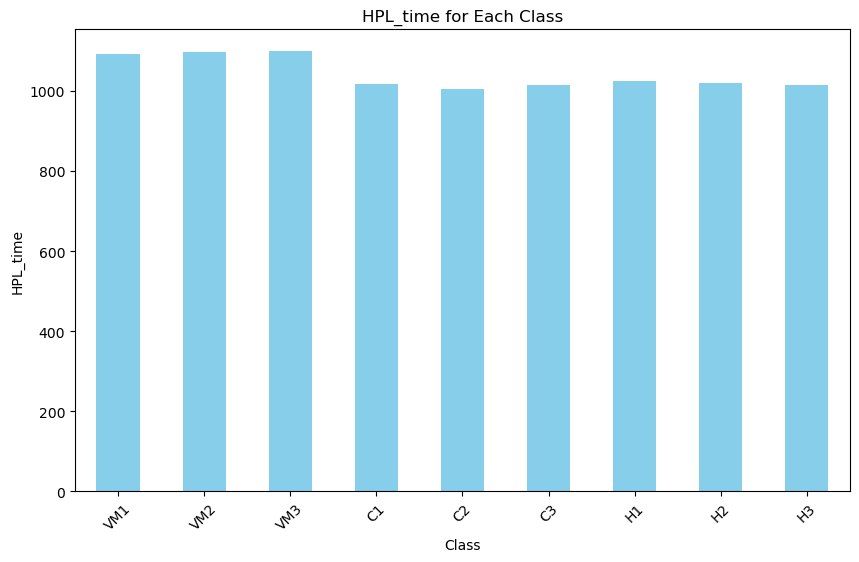

In [19]:
# Extract the HPL_time row
hpl_time = df[df['RUN'] == 'HPL_time']

# Convert the values to numeric for plotting
hpl_time_values = pd.to_numeric(hpl_time.iloc[0, 1:])

# Plot the HPL_time values
plt.figure(figsize=(10, 6))
hpl_time_values.plot(kind='bar', color='skyblue')
plt.title('HPL_time for Each Class')
plt.xlabel('Class')
plt.ylabel('HPL_time')
plt.xticks(ticks=range(len(hpl_time_values.index)), labels=hpl_time_values.index, rotation=45)
plt.show()

In [20]:
df['VM_mean'] = df[['VM1', 'VM2', 'VM3']].apply(pd.to_numeric).mean(axis=1)
df['C_mean'] = df[['C1', 'C2', 'C3']].apply(pd.to_numeric).mean(axis=1)
df['H_mean'] = df[['H1', 'H2', 'H3']].apply(pd.to_numeric).mean(axis=1)

df.head()

/tmp/ipykernel_7886/3922775091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VM_mean'] = df[['VM1', 'VM2', 'VM3']].apply(pd.to_numeric).mean(axis=1)
/tmp/ipykernel_7886/3922775091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C_mean'] = df[['C1', 'C2', 'C3']].apply(pd.to_numeric).mean(axis=1)
/tmp/ipykernel_7886/3922775091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,RUN,VM1,VM2,VM3,C1,C2,C3,H1,H2,H3,VM_mean,C_mean,H_mean
0,MPI_Wtick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e-09,1.000000e-09,1.000000e-09
1,HPL_Gflops,5141.37,5127.89,5115.76,5526.49,5591.06,5538.6,5489.35,5515.84,5542.37,5.128340e+03,5.552050e+03,5.515853e+03
2,HPL_time,1093.2,1096.07,1098.67,1017.02,1005.27,1014.79,1023.9,1018.98,1014.1,1.095980e+03,1.012360e+03,1.018993e+03
3,HPL_eps,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.110000e-16,1.110000e-16,1.110000e-16
4,HPL_RnormI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.670000e-09,4.670000e-09,4.670000e-09


In [31]:
df = df[['RUN', 'VM_mean', 'C_mean', 'H_mean']]
df.columns = ['Metric', 'VM', 'Container', 'Host']
df.head()

,Metric,VM,Container,Host
0,MPI_Wtick,1.000000e-09,1.000000e-09,1.000000e-09
1,HPL_Gflops,5.128340e+03,5.552050e+03,5.515853e+03
2,HPL_time,1.095980e+03,1.012360e+03,1.018993e+03
3,HPL_eps,1.110000e-16,1.110000e-16,1.110000e-16
4,HPL_RnormI,4.670000e-09,4.670000e-09,4.670000e-09


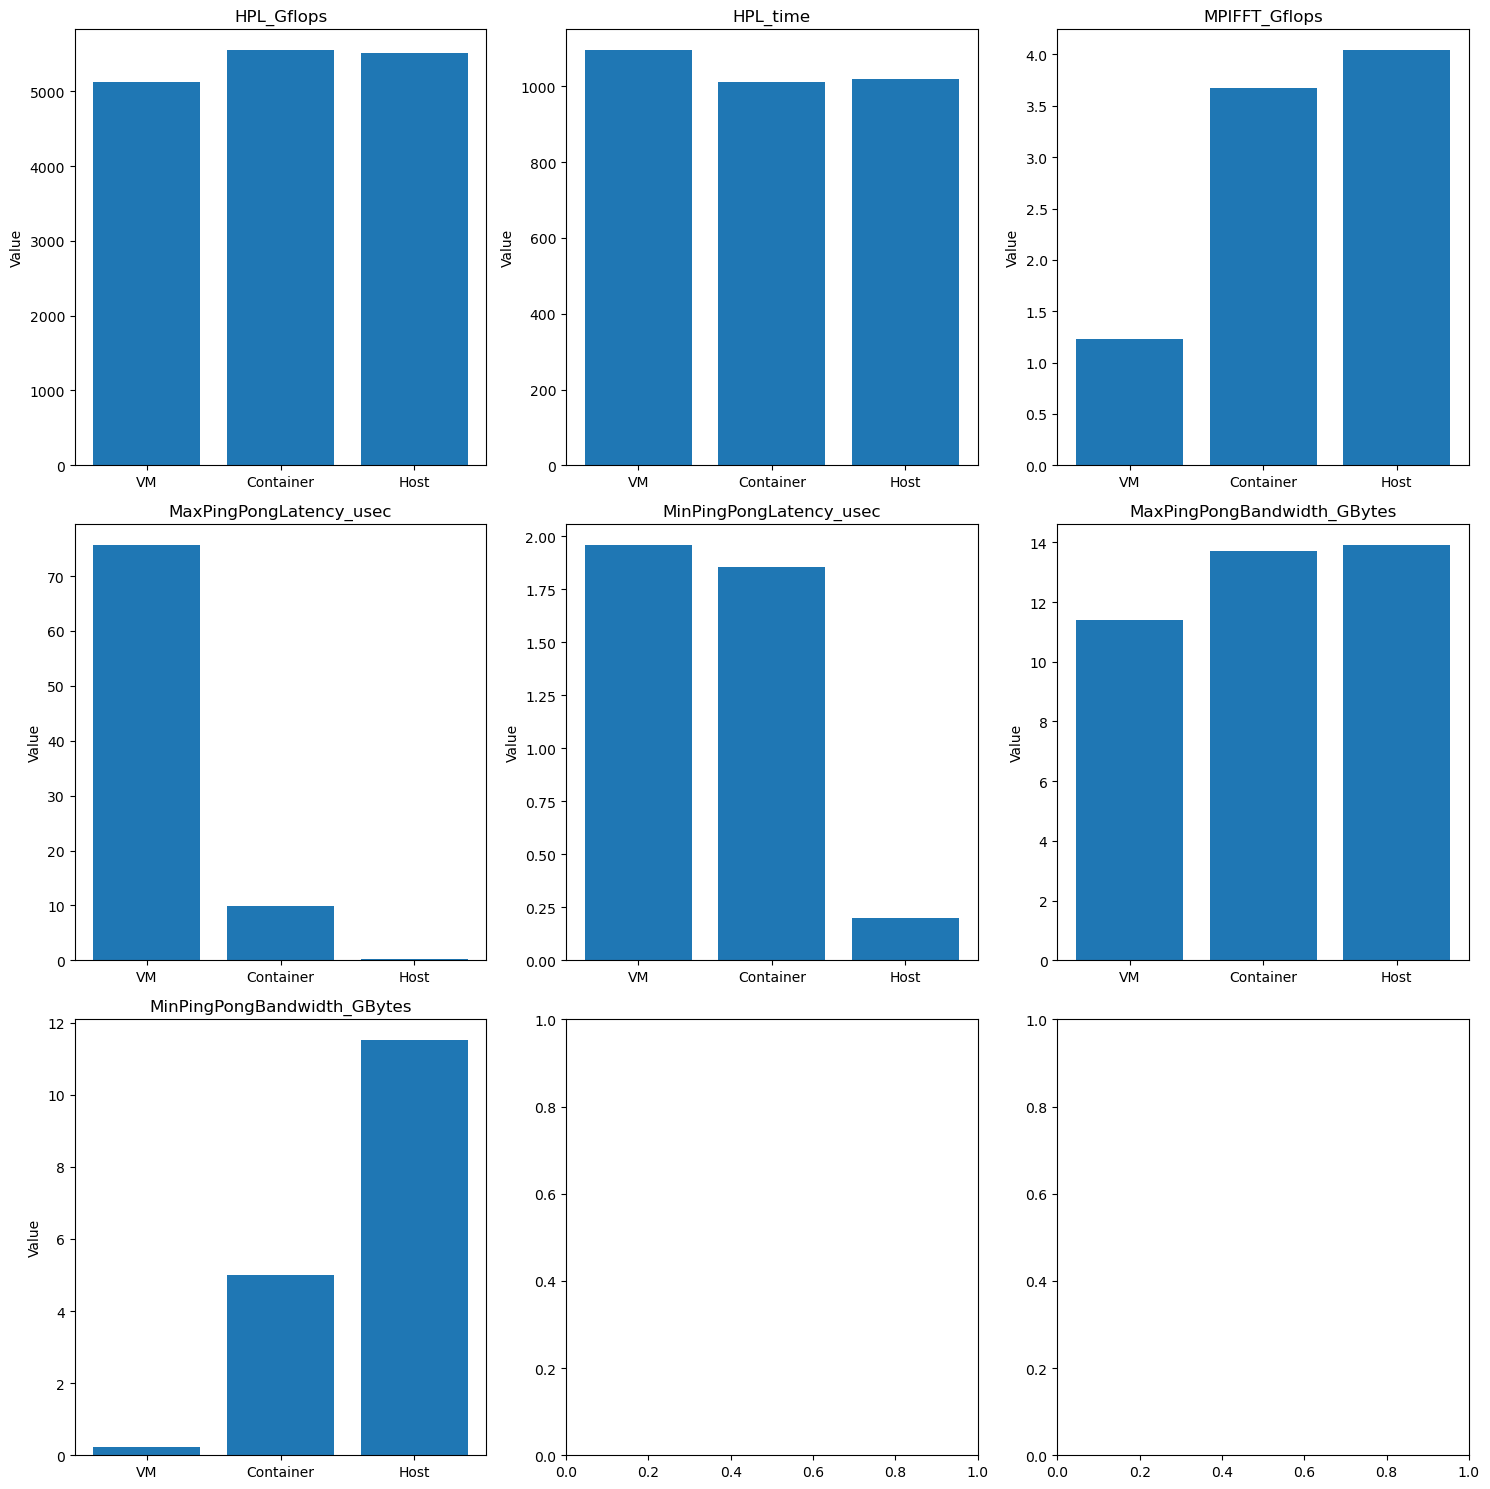

In [35]:
# List of metrics to plot
metrics = [
    "HPL_Gflops", "HPL_time", "MPIFFT_Gflops", "MaxPingPongLatency_usec", 
    "MinPingPongLatency_usec", "MaxPingPongBandwidth_GBytes","MinPingPongBandwidth_GBytes"
]

# Filter the dataframe for the specified metrics
filtered_df = df[df['Metric'].isin(metrics)]

# Set up the subplots
num_metrics = len(metrics)
fig, axes = plt.subplots(nrows=(num_metrics + 2) // 3, ncols=3, figsize=(15, 5 * ((num_metrics + 2) // 3)))
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    if metric in filtered_df['Metric'].values:
        row = filtered_df[filtered_df['Metric'] == metric]
        axes[i].bar(['VM', 'Container', 'Host'], row[['VM', 'Container', 'Host']].values[0])
        axes[i].set_title(metric)
        axes[i].set_ylabel('Value')
    else:
        axes[i].axis('off')  # Hide unused subplot

# Adjust layout
plt.tight_layout()
plt.show()

# `stress-ng`

In [117]:
stress_df = pd.read_csv('stress.csv')
stress_df.head()
stress_df['stressor'] = stress_df['stressor'].replace('vm', 'memory')
stress_df.head()
len(stress_df)

180

In [ ]:
# Remove commas before converting to numeric
stress_df['Bogo Ops/s (Real Time)'] = pd.to_numeric(stress_df['Bogo Ops/s (Real Time)'].str.replace(',', ''), errors='raise')
stress_df['Bogo Ops/s (Usr+Sys Time)'] = pd.to_numeric(stress_df['Bogo Ops/s (Usr+Sys Time)'].str.replace(',', ''), errors='raise')

In [126]:
stress_df = stress_df[(stress_df['Bogo Ops/s (Real Time)'] <= 1e6) & (stress_df['Bogo Ops/s (Usr+Sys Time)'] <= 1e6)]
stress_df.head()
len(stress_df)

175

In [136]:
vm_cpu_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'cpu')]
vm_cpu_df = vm_cpu_df.drop(columns=['Support', 'stressor','Run'])
c_cpu_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'cpu')]
c_cpu_df = c_cpu_df.drop(columns=['Support', 'stressor','Run'])
host_cpu_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'cpu')]
host_cpu_df = host_cpu_df.drop(columns=['Support', 'stressor','Run'])


cpu_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_cpu_df['Bogo Ops/s (Real Time)'],
        c_cpu_df['Bogo Ops/s (Real Time)'],
        host_cpu_df['Bogo Ops/s (Real Time)'],
        vm_cpu_df['Bogo Ops/s (Usr+Sys Time)'],
        c_cpu_df['Bogo Ops/s (Usr+Sys Time)'],
        host_cpu_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM'] * len(vm_cpu_df) + 
        ['Container'] * len(c_cpu_df) + 
        ['Host'] * len(host_cpu_df) +
        ['VM'] * len(vm_cpu_df) + 
        ['Container'] * len(c_cpu_df) + 
        ['Host'] * len(host_cpu_df)
    ),
    'Metric': (
        ['Real Time'] * len(vm_cpu_df) + 
        ['Real Time'] * len(c_cpu_df) + 
        ['Real Time'] * len(host_cpu_df) +
        ['Usr+Sys Time'] * len(vm_cpu_df) + 
        ['Usr+Sys Time'] * len(c_cpu_df) + 
        ['Usr+Sys Time'] * len(host_cpu_df)
    )
})

cpu_data.head()

,Bogo Ops/s,Type,Metric
0,933.13,VM,Real Time
1,930.14,VM,Real Time
2,929.84,VM,Real Time
3,929.57,VM,Real Time
4,907.39,VM,Real Time


In [133]:
# Filter for VM and Container with 'memory' as stressor
vm_mem_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'memory')]
c_mem_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'memory')]
host_mem_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'memory')]

# Build the new dataframe
memory_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_mem_df['Bogo Ops/s (Real Time)'],
        c_mem_df['Bogo Ops/s (Real Time)'],
        host_mem_df['Bogo Ops/s (Real Time)'],
        vm_mem_df['Bogo Ops/s (Usr+Sys Time)'],
        c_mem_df['Bogo Ops/s (Usr+Sys Time)'],
        host_mem_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM Memory'] * len(vm_mem_df) + ['Container Memory'] * len(c_mem_df) +
        ['Host Memory'] * len(host_mem_df) + ['VM Memory'] * len(vm_mem_df) +
        ['Container Memory'] * len(c_mem_df) + ['Host Memory'] * len(host_mem_df)
    ),
    'Metric': (
        ['Real Time'] * (len(vm_mem_df) + len(c_mem_df) + len(host_mem_df)) +
        ['Usr+Sys Time'] * (len(vm_mem_df) + len(c_mem_df) + len(host_mem_df))
    )
})

memory_data.head()

,Bogo Ops/s,Type,Metric
40,40182.77,VM Memory,Real Time
41,40030.53,VM Memory,Real Time
42,40034.76,VM Memory,Real Time
43,39275.36,VM Memory,Real Time
44,40374.06,VM Memory,Real Time


In [138]:
# Filter for VM, Container, and Host with 'hdd' as stressor
vm_hdd_df = stress_df[(stress_df['Support'] == 'vm') & (stress_df['stressor'] == 'hdd')]
c_hdd_df = stress_df[(stress_df['Support'] == 'container') & (stress_df['stressor'] == 'hdd')]
host_hdd_df = stress_df[(stress_df['Support'] == 'host') & (stress_df['stressor'] == 'hdd')]

# Build the new dataframe
hdd_data = pd.DataFrame({
    'Bogo Ops/s': pd.concat([
        vm_hdd_df['Bogo Ops/s (Real Time)'],
        c_hdd_df['Bogo Ops/s (Real Time)'],
        host_hdd_df['Bogo Ops/s (Real Time)'],
        vm_hdd_df['Bogo Ops/s (Usr+Sys Time)'],
        c_hdd_df['Bogo Ops/s (Usr+Sys Time)'],
        host_hdd_df['Bogo Ops/s (Usr+Sys Time)']
    ]),
    'Type': (
        ['VM HDD'] * len(vm_hdd_df) + ['Container HDD'] * len(c_hdd_df) +
        ['Host HDD'] * len(host_hdd_df) + ['VM HDD'] * len(vm_hdd_df) +
        ['Container HDD'] * len(c_hdd_df) + ['Host HDD'] * len(host_hdd_df)
    ),
    'Metric': (
        ['Real Time'] * (len(vm_hdd_df) + len(c_hdd_df) + len(host_hdd_df)) +
        ['Usr+Sys Time'] * (len(vm_hdd_df) + len(c_hdd_df) + len(host_hdd_df))
    )
})

hdd_data.head()

,Bogo Ops/s,Type,Metric
20,993.88,VM HDD,Real Time
21,991.75,VM HDD,Real Time
22,969.59,VM HDD,Real Time
23,969.69,VM HDD,Real Time
24,1082.72,VM HDD,Real Time


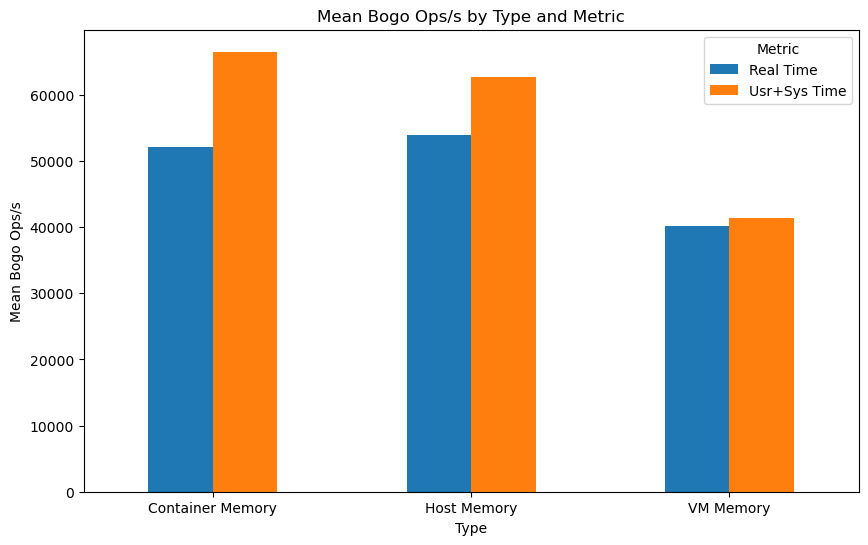

In [134]:
memory_data['Bogo Ops/s'] = pd.to_numeric(memory_data['Bogo Ops/s'], errors='coerce')
mean_values = memory_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()

mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

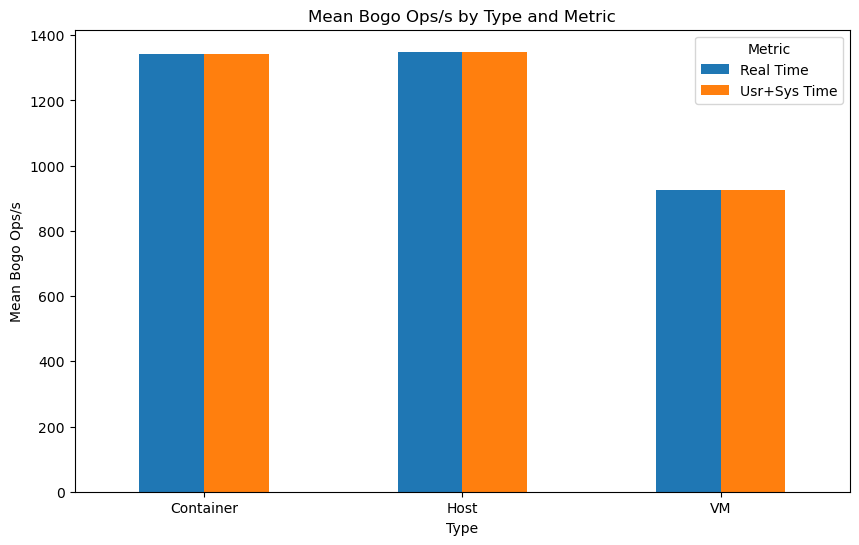

In [137]:
cpu_data['Bogo Ops/s'] = pd.to_numeric(cpu_data['Bogo Ops/s'], errors='coerce')
mean_values = cpu_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()

mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

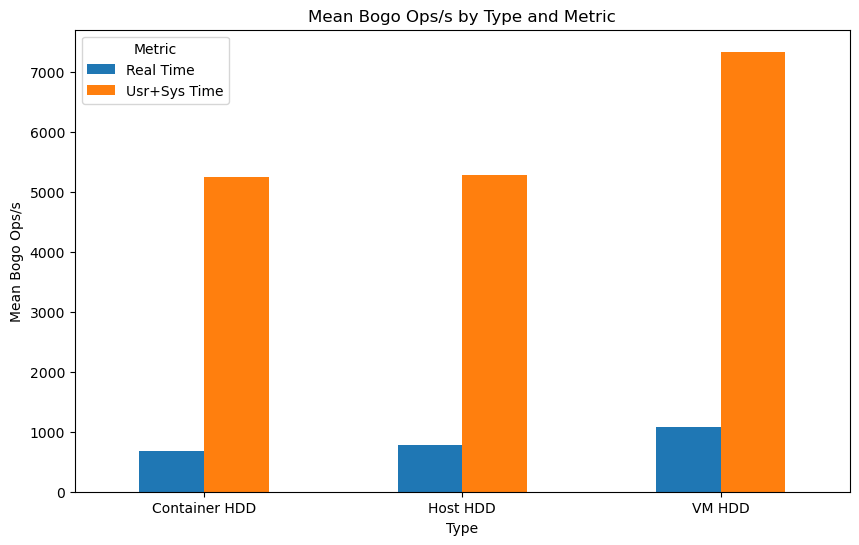

In [139]:
hdd_data['Bogo Ops/s'] = pd.to_numeric(hdd_data['Bogo Ops/s'], errors='coerce')
mean_values = hdd_data.groupby(['Type', 'Metric'])['Bogo Ops/s'].mean().unstack()

mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Bogo Ops/s by Type and Metric')
plt.ylabel('Mean Bogo Ops/s')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()

# `sysbench`

In [143]:
sysbench_cpu = pd.read_csv('sysbench - cpu.csv')
sysbench_cpu.head()

,support,events_per_sec,total_time,total_events,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,453.61,10.0004,4537,2.03,2.20,7.37,2.35,9997.35,4537,0,9.9973,0
1,vm,454.32,10.0004,4544,2.04,2.20,6.75,2.35,9997.37,4544,0,9.9974,0
2,vm,454.85,10.0018,4550,2.03,2.20,5.18,2.35,9998.86,4550,0,9.9989,0
3,vm,455.40,10.0008,4555,2.03,2.19,8.29,2.35,9998.04,4555,0,9.9980,0
4,vm,451.09,10.0009,4512,2.06,2.22,6.20,2.39,9997.94,4512,0,9.9979,0


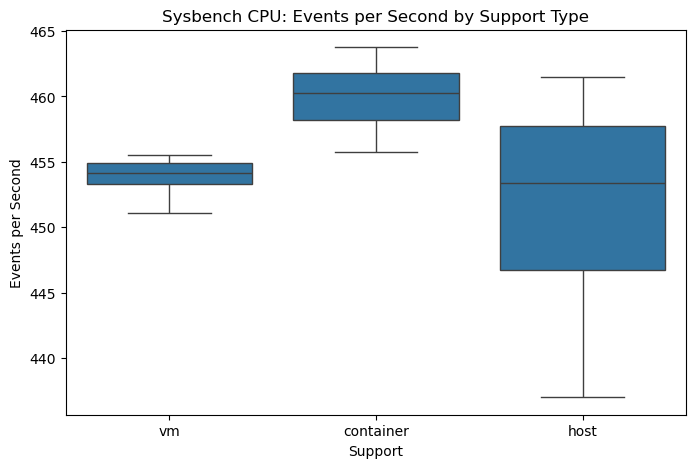

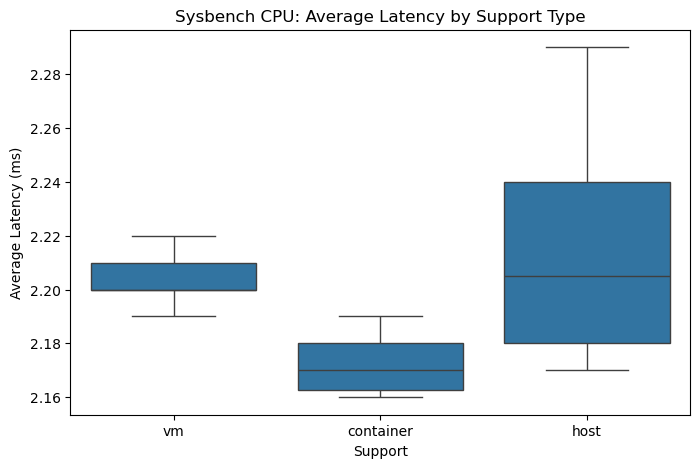

In [145]:
# Boxplot of events_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu)
plt.title('Sysbench CPU: Events per Second by Support Type')
plt.ylabel('Events per Second')
plt.xlabel('Support')
plt.show()

# Boxplot of latency_avg by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu)
plt.title('Sysbench CPU: Average Latency by Support Type')
plt.ylabel('Average Latency (ms)')
plt.xlabel('Support')
plt.show()

In [146]:
sysbench_memory = pd.read_csv('sysbench - memory.csv')
sysbench_memory.head()

,support,total_operations,ops_per_sec,transfer_mib,transfer_rate_mibs,total_time,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,10485760,4084237.70,10240,3988.51,2.5659,0,0,2.51,0,1063.98,10485760,0,1.0665,0
1,vm,10485760,4050951.60,10240,3956.01,2.5869,0,0,1.67,0,1072.58,10485760,0,1.0726,0
2,vm,10485760,4031061.30,10240,3936.58,2.5991,0,0,1.34,0,1077.06,10485760,0,1.0771,0
3,vm,10485760,4095310.05,10240,3999.33,2.5589,0,0,0.90,0,1059.26,10485760,0,1.0593,0
4,vm,10485760,4080990.49,10240,3985.34,2.5675,0,0,0.90,0,1062.70,10485760,0,1.0627,0


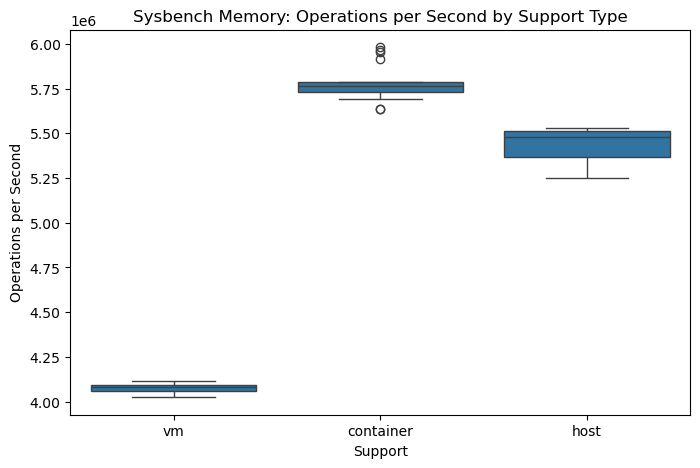

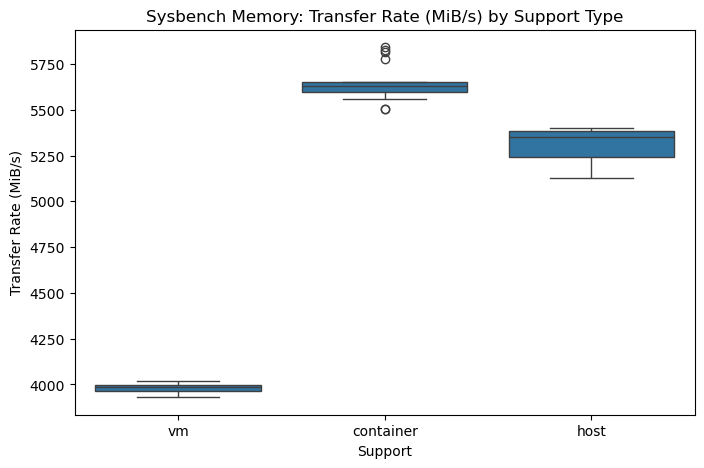

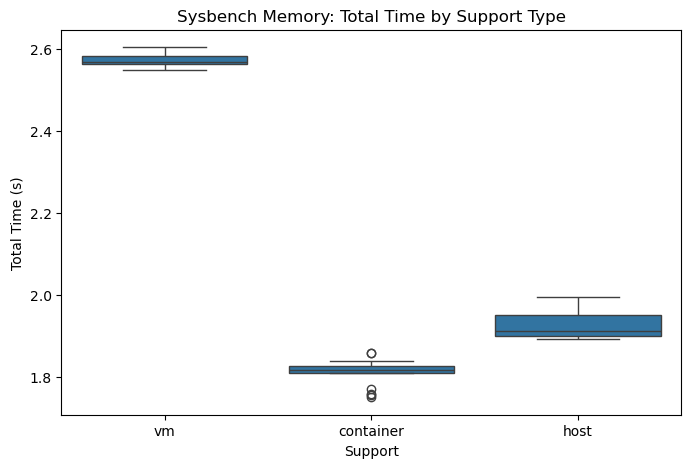

In [150]:
# Boxplot: ops_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory)
plt.title('Sysbench Memory: Operations per Second by Support Type')
plt.ylabel('Operations per Second')
plt.xlabel('Support')
plt.show()

# Boxplot: transfer_rate_mibs by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory)
plt.title('Sysbench Memory: Transfer Rate (MiB/s) by Support Type')
plt.ylabel('Transfer Rate (MiB/s)')
plt.xlabel('Support')
plt.show()

# Boxplot: total_time by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='total_time', data=sysbench_memory)
plt.title('Sysbench Memory: Total Time by Support Type')
plt.ylabel('Total Time (s)')
plt.xlabel('Support')
plt.show()

# `iperf`

In [155]:
iperf_standard = pd.read_csv('iperf - standard.csv')
iperf_standard.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6
0,vm,node01,0.00-1.00,367.0,MBytes,3.08,Gbits/sec
1,vm,node01,1.00-2.00,385.0,MBytes,3.23,Gbits/sec
2,vm,node01,2.00-3.00,392.0,MBytes,3.29,Gbits/sec
3,vm,node01,3.00-4.00,398.0,MBytes,3.34,Gbits/sec
4,vm,node01,4.00-5.00,406.0,MBytes,3.41,Gbits/sec


In [156]:
# Define a mapping for metric prefixes to their decimal multipliers
prefix_multipliers = {
    'K': 1e3,
    'M': 1e6,
    'G': 1e9
}

# Helper function to convert value and unit to decimal
def convert_with_unit(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    unit = str(unit)
    for prefix, multiplier in prefix_multipliers.items():
        if unit.startswith(prefix):
            return float(value) * multiplier
    return float(value)

# Convert 'Transfer' and 'Bitrate' columns to decimal format
iperf_standard['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Transfer'], iperf_standard['Unnamed: 4'])
]
iperf_standard['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Bitrate'], iperf_standard['Unnamed: 6'])
]

# Drop the old columns and rename for clarity
iperf_standard = iperf_standard.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])

In [158]:
iperf_standard.head()

,Support,Link,Interval (sec),Transfer (Bytes),Bitrate (bits/sec)
0,vm,node01,0.00-1.00,367000000.0,3.080000e+09
1,vm,node01,1.00-2.00,385000000.0,3.230000e+09
2,vm,node01,2.00-3.00,392000000.0,3.290000e+09
3,vm,node01,3.00-4.00,398000000.0,3.340000e+09
4,vm,node01,4.00-5.00,406000000.0,3.410000e+09


/tmp/ipykernel_7886/1222710755.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')


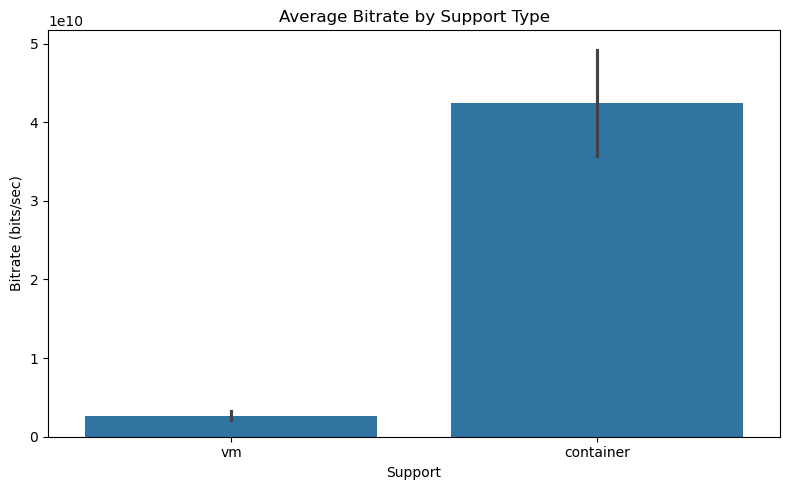

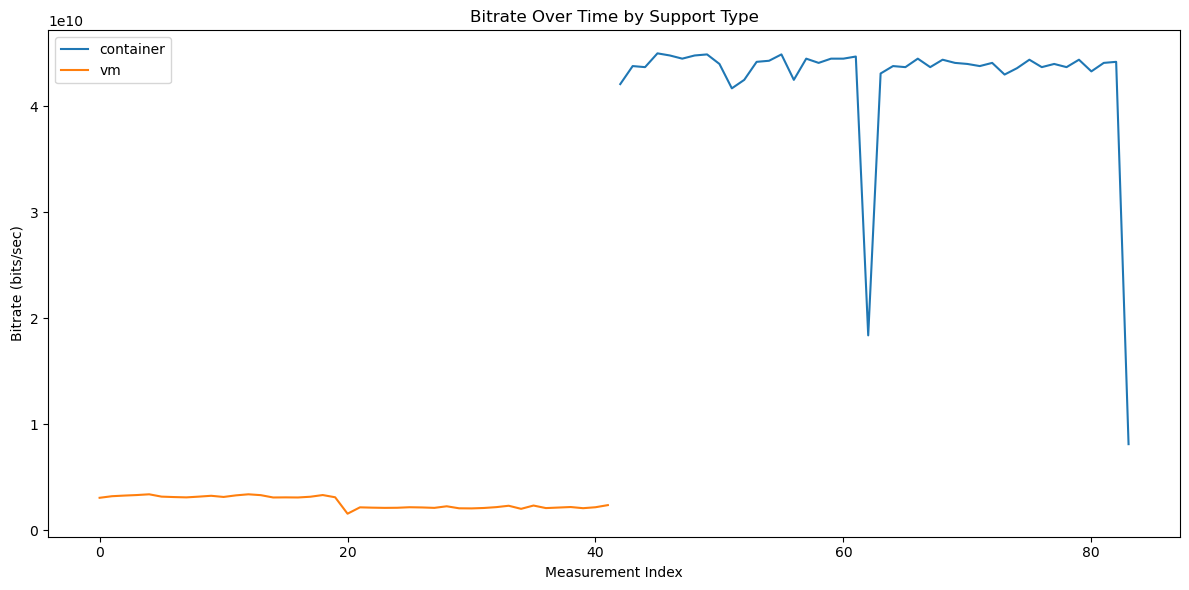

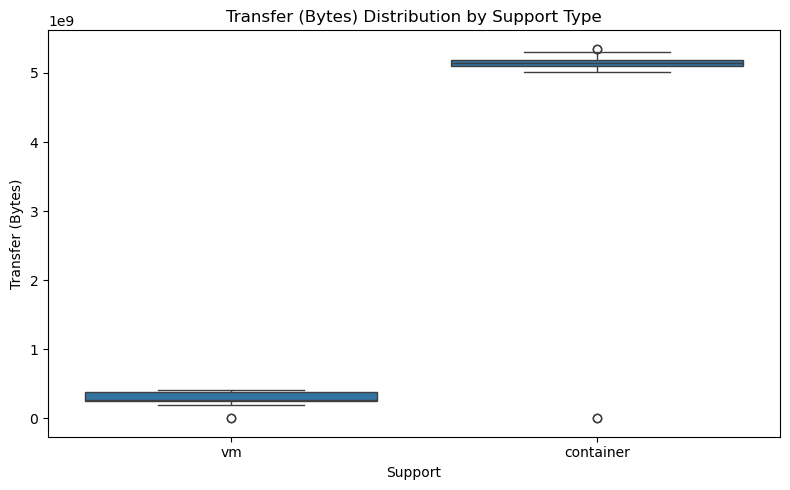

In [159]:
# Plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (bits/sec)', data=iperf_standard, estimator=np.mean, ci='sd')
plt.title('Average Bitrate by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

# Plot Bitrate over time for each Support type
plt.figure(figsize=(12, 6))
for support, group in iperf_standard.groupby('Support'):
    plt.plot(group.index, group['Bitrate (bits/sec)'], label=support)
plt.title('Bitrate Over Time by Support Type')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Measurement Index')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Transfer (Bytes) distribution by Support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Support', y='Transfer (Bytes)', data=iperf_standard)
plt.title('Transfer (Bytes) Distribution by Support Type')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

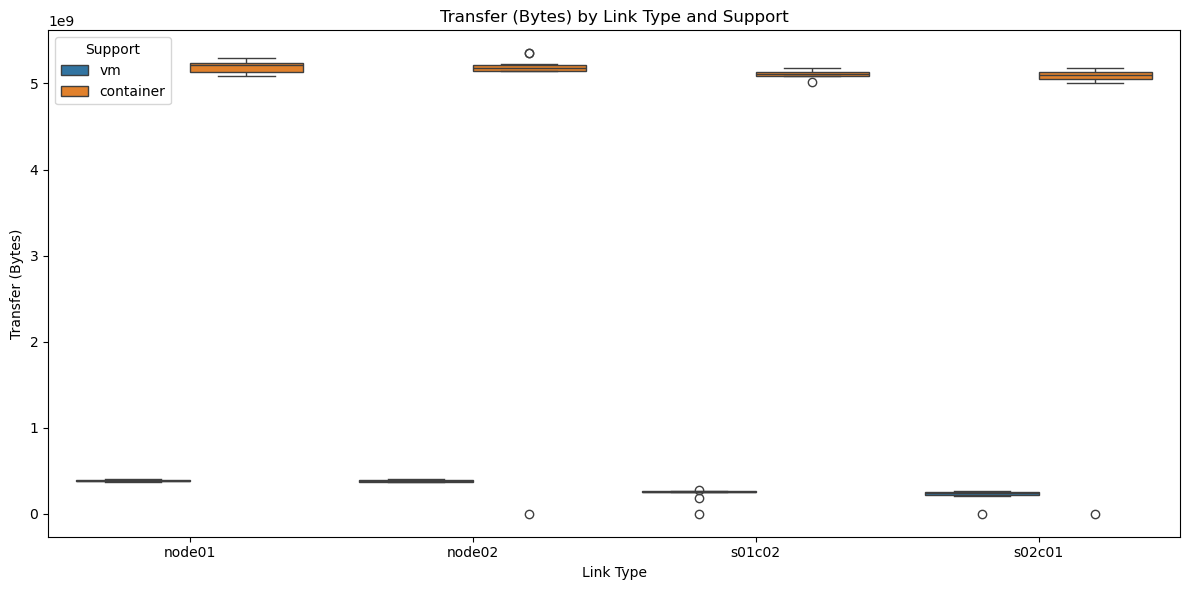

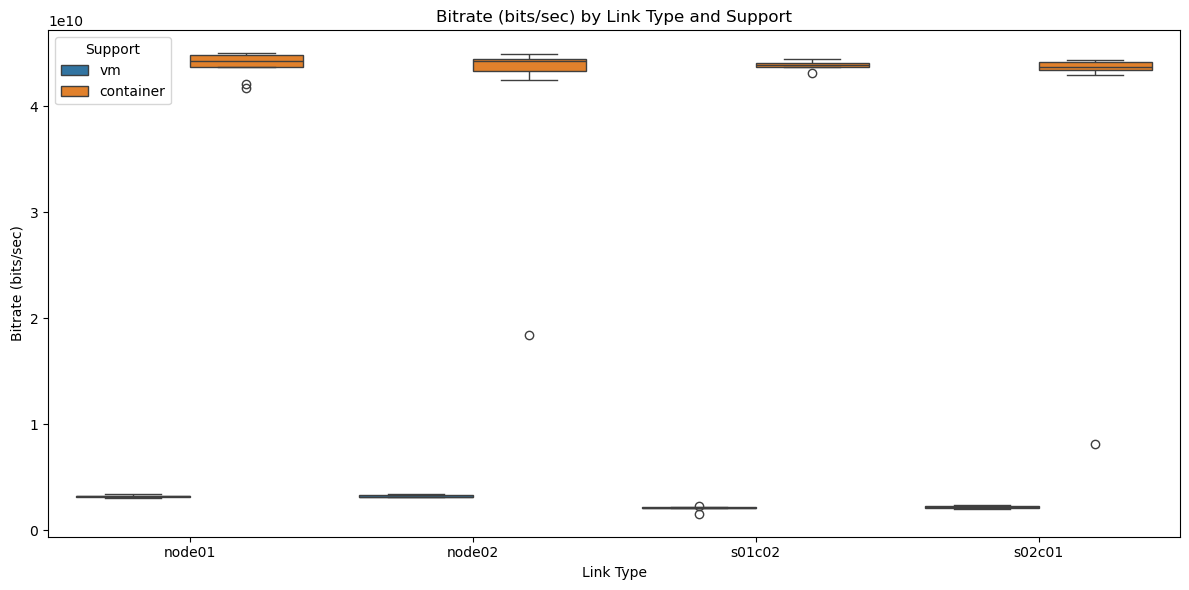

In [160]:
# Plot Transfer (Bytes) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Transfer (Bytes)', hue='Support', data=iperf_standard)
plt.title('Transfer (Bytes) by Link Type and Support')
plt.ylabel('Transfer (Bytes)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Link', y='Bitrate (bits/sec)', hue='Support', data=iperf_standard)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (bits/sec)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()